In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
from scipy.optimize import curve_fit
from tqdm import tqdm
import scipy.stats as stats

# CTN - Resultados

In [2]:
#Concentración de péptido en cubeta
c_cub = np.array([0.001666667, 0.000666667, 0.000166667, 6.66667E-05, 1.66667E-05, 6.66667E-06, 1.66667E-06, 6.66667E-07, 1.66667E-07, 6.66667E-08])
#Porcentaje de fuga
L = np.array([100, 100, 100, 100, 84.58591914, 69.24904046, 29.07356667, 13.8721776, 7.004393939, 2.573723143])

In [3]:
#Calculando el ln de la concentración
c_cub = np.log(c_cub)

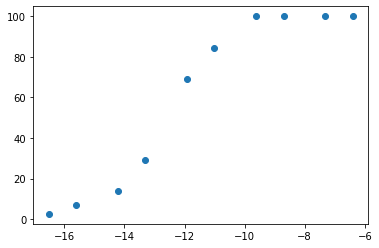

In [4]:
plt.scatter(c_cub,L)

In [5]:
#Modelo 1

def Sigmoide(x,A,B,C): 
    return A/(B+np.exp(-C*x))

In [6]:
#Modelo 2

def Sigmoide1(x,A,B,C,D): 
    return A/(B+C*np.exp(-x*D))

In [7]:
#Param contiene los parámetros, pcov es la matriz de covarianza (los elementos diagonales son la varianza de los parámetros ajustados)
# Link: https://learntutorials.net/es/scipy/topic/10133/ajustando-funciones-con-scipy-optimize-curve-fit#:~:text=curve_fit%20devuelve%20popt%20y%20pcov,varianza%20de%20los%20par%C3%A1metros%20ajustados.
param, pcov = curve_fit(Sigmoide,c_cub,L)
param1, pcov1 = curve_fit(Sigmoide1,c_cub,L)

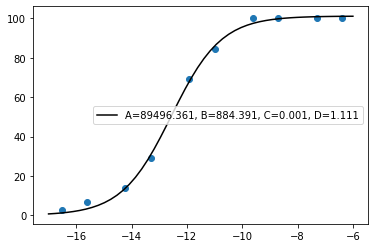

In [8]:
#gráfica de los ajustes, son casi indistingibles

t = np.linspace(-17,-6,50)
plt.scatter(c_cub,L)
#plt.plot(t,Sigmoide(t,*param),color='r', label='A=%.3f, B=%.3f, C=%.3f' %tuple(param))
plt.plot(t,Sigmoide1(t,*param1),color='k', label='A=%.3f, B=%.3f, C=%.3f, D=%.3f' %tuple(param1))
plt.legend(loc=0)

coef_corr = np.corrcoef(L, Sigmoide1(c_cub,*param1))

## Prueba de bondad de ajuste

#### En prueba de bondad de ajuste se manejan dos hipótesis

##### H0 = Los datos siguen la distribución hipotética
##### H1 = Los datos no siguen la distribución hipotética

#### Entre mayor sea el valor del estadístico, mayor evidencia habrá para rechazar H0. El intervalo de confianza que trabaja el módulo stats es 95%, por lo tanto alpha es 5%. Si el p_value es menor a 0.05 entonces se debe rechazar H0, es decir, los datos no pueden provenir de la función propuesta.

###### Link: https://statologos.jaol.net/chi-cuadrado-prueba-de-bondad-de-ajuste-piton/
###### 

In [9]:
#Para realizar la prueba Chi cuadrado de bondad de ajuste

#Segundo modelo

L_esp1 = Sigmoide1(c_cub, *param1)      #Se calculan los esperados de acuerdo con el ajuste

a1 = stats.chisquare (f_obs = L, f_exp = L_esp1)   #Contiene el estadístico y el p_value

a1

Power_divergenceResult(statistic=5.845024236047775, pvalue=0.7553231774309441)

In [10]:
#Calculo del error cuadrático de cada dato y el error cuadrático medio

#Modelo 2
error1 = np.sqrt((L - L_esp1)**2)
erm1 = error1.mean()

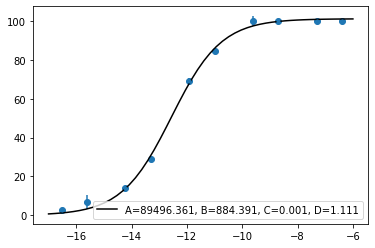

In [11]:
plt.scatter(c_cub,L)
plt.plot(t,Sigmoide1(t,*param1),color='k', label='A=%.3f, B=%.3f, C=%.3f, D=%.3f' %tuple(param1))
plt.errorbar(c_cub,L, yerr=error1, xerr= 0, fmt='.')

plt.legend(loc=0)

In [12]:
#Calculando las nuevas sigmoides considerando dichos errores

#Modelo 2: 

L_max1 = L + error1
L_min1 = L - error1

In [13]:
#Encontrando los parámetros: 

param1_max, pcov1 = curve_fit(Sigmoide1,c_cub,L_max1)
param1_min, pcov1 = curve_fit(Sigmoide1,c_cub,L_min1)

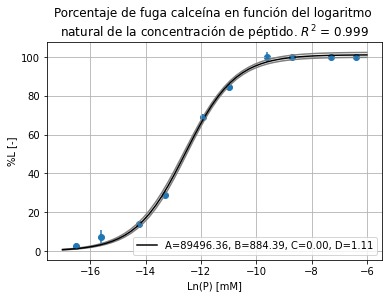

In [14]:
t = np.linspace(-17,-6,50)
plt.scatter(c_cub,L)
#plt.plot(t,Sigmoide(t,*param),color='r')#, label='A=%.3f, B=%.3f, C=%.3f' %tuple(param))
plt.plot(t,Sigmoide1(t,*param1_max), color = 'gray') #label='A=%.2f, B=%.2f, C=%.2f, D=%.2f' %tuple(param1_max))
plt.plot(t,Sigmoide1(t,*param1_min), color = 'gray') #label='A=%.2f, B=%.2f, C=%.2f, D=%.2f' %tuple(param1_min))
plt.errorbar(c_cub,L, yerr=error1, xerr=0, fmt='.')
plt.xlabel('Ln(P) [mM]')
plt.ylabel('%L [-]')
plt.title('Porcentaje de fuga calceína en función del logaritmo \n' 'natural de la concentración de péptido. $R^2$ = {:.3f}'.format(coef_corr[0][1]))
plt.grid()
plt.plot(t,Sigmoide1(t,*param1),color='k', label='A=%.2f, B=%.2f, C=%.2f, D=%.2f' %tuple(param1))
plt.legend(loc=0)

In [15]:
#Determinación de concentración para L=50%

c501 = np.log((param1[0]-50*param1[1])/(param1[2]*50))/(-param1[3])

c501_0 = np.exp(c501)

#Incertidumbre de acuerdo con ajustes: 

c50max_0 = np.log((param1_max[0]-50*param1_max[1])/(param1_max[2]*50))/(-param1_max[3])

c501max_0 = np.exp(c50max_0)

c50min_0 = np.log((param1_min[0]-50*param1_min[1])/(param1_min[2]*50))/(-param1_min[3])

c501min_0 = np.exp(c50min_0)

c501_0, c501max_0, c501min_0

(3.4391969002450405e-06, 3.222337483415493e-06, 3.6654962704003405e-06)

In [16]:
#Error

e_max = []

e_min = []

err_0 = np.sqrt((c501_0 - c501max_0)**2)
err_1 = np.sqrt((c501_0 - c501min_0)**2)

a = min(err_0,err_1)
b = max(err_0,err_1)

e_min.append(a)
e_max.append(b)

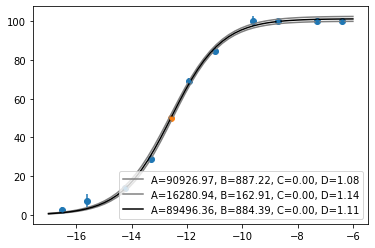

In [17]:
t = np.linspace(-17,-6,50)
plt.scatter(c_cub,L)
#plt.plot(t,Sigmoide(t,*param),color='r')#, label='A=%.3f, B=%.3f, C=%.3f' %tuple(param))
plt.plot(t,Sigmoide1(t,*param1_max), color = 'gray', label='A=%.2f, B=%.2f, C=%.2f, D=%.2f' %tuple(param1_max))
plt.plot(t,Sigmoide1(t,*param1_min), color = 'gray', label='A=%.2f, B=%.2f, C=%.2f, D=%.2f' %tuple(param1_min))
plt.errorbar(c_cub,L, yerr=error1, xerr=0, fmt='.')
plt.scatter(np.log(c501_0), 50)    
plt.errorbar(np.log(c501_0),50, xerr=[[a],[b]], fmt='.')
plt.plot(t,Sigmoide1(t,*param1),color='k', label='A=%.2f, B=%.2f, C=%.2f, D=%.2f' %tuple(param1))
plt.legend(loc=0)

# CTN 1 - Resultados

In [18]:
c_cub = [2,0.2, 0.02, 0.002, 0.0002]
L = [100.000, 100.000, 29.441, 6.289, 2.270]

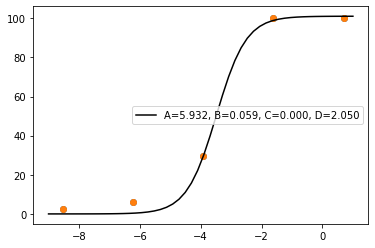

In [19]:
#Calculando el ln de la concentración
c_cub = np.log(c_cub)

plt.scatter(c_cub,L)

#Modelo 2

def Sigmoide1(x,A,B,C,D): 
    return A/(B+C*np.exp(-x*D))

#Param contiene los parámetros, pcov es la matriz de covarianza (los elementos diagonales son la varianza de los parámetros ajustados)
# Link: https://learntutorials.net/es/scipy/topic/10133/ajustando-funciones-con-scipy-optimize-curve-fit#:~:text=curve_fit%20devuelve%20popt%20y%20pcov,varianza%20de%20los%20par%C3%A1metros%20ajustados.

param1, pcov1 = curve_fit(Sigmoide1,c_cub,L)

t = np.linspace(-9,1,50)
plt.scatter(c_cub,L)
#plt.plot(t,Sigmoide(t,*param),color='r', label='A=%.3f, B=%.3f, C=%.3f' %tuple(param))
plt.plot(t,Sigmoide1(t,*param1),color='k', label='A=%.3f, B=%.3f, C=%.3f, D=%.3f' %tuple(param1))
plt.legend(loc=0)

Power_divergenceResult(statistic=1633.623953608969, pvalue=0.0)

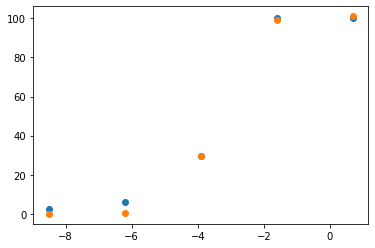

In [20]:
#Para realizar la prueba Chi cuadrado de bondad de ajuste

L_esp1 = Sigmoide1(c_cub, *param1)      #Se calculan los esperados de acuerdo con el ajuste

a1 = stats.chisquare(f_obs = L, f_exp = L_esp1)   #Contiene el estadístico y el p_value

plt.scatter(c_cub,L)
plt.scatter(c_cub,L_esp1)

a1

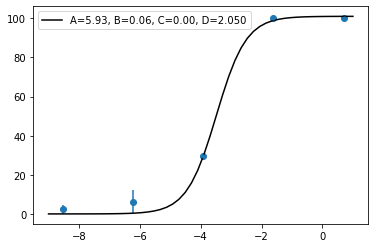

In [21]:
#Calculo del error cuadrático de cada dato y el error cuadrático medio

#Modelo 2
error1 = np.sqrt((L - L_esp1)**2)
erm1 = error1.mean()

t = np.linspace(-9,1,50)
plt.scatter(c_cub,L)
plt.plot(t,Sigmoide1(t,*param1),color='k', label='A=%.2f, B=%.2f, C=%.2f, D=%.3f' %tuple(param1))
plt.errorbar(c_cub,L, yerr=error1, xerr= 0, fmt='.')

plt.legend(loc=0)

coef_corr = np.corrcoef(L, Sigmoide1(c_cub,*param1))

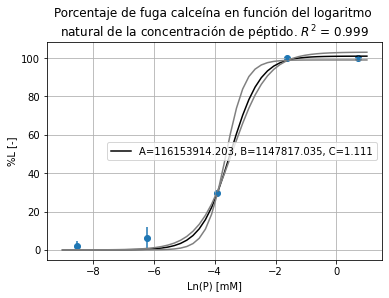

In [22]:
#Calculando las nuevas sigmoides considerando dichos errores

#Modelo 2: 

L_max1 = L + error1
L_min1 = L - error1

#Encontrando los parámetros: 

param1_max, pcov1 = curve_fit(Sigmoide1,c_cub,L_max1)
param1_min, pcov1 = curve_fit(Sigmoide1,c_cub,L_min1)

t = np.linspace(-9,1,50)
plt.scatter(c_cub,L)
plt.plot(t,Sigmoide1(t,*param1),color='k', label='A=%.3f, B=%.3f, C=%.3f' %tuple(param))
plt.plot(t,Sigmoide1(t,*param1_max), color = 'gray')
plt.plot(t,Sigmoide1(t,*param1_min), color = 'gray')
plt.errorbar(c_cub,L, yerr=error1, xerr=0, fmt='.')
plt.legend()
plt.xlabel('Ln(P) [mM]')
plt.ylabel('%L [-]')
plt.title('Porcentaje de fuga calceína en función del logaritmo \n' 'natural de la concentración de péptido. $R^2$ = {:.3f}'.format(coef_corr[0][1]))
plt.grid()

plt.legend(loc=0)

In [23]:
#Determinación de concentración para L=50%

c501 = np.log((param1[0]-50*param1[1])/(param1[2]*50))/(-param1[3])

c501_1 = np.exp(c501)

#Incertidumbre de acuerdo con ajustes: 

c501max_0 = np.log((param1_max[0]-50*param1_max[1])/(param1_max[2]*50))/(-param1_max[3])

c501max_1 = np.exp(c501max_0)

c501min_0 = np.log((param1_min[0]-50*param1_min[1])/(param1_min[2]*50))/(-param1_min[3])

c501min_1 = np.exp(c501min_0)

c501_1, c501max_1, c501min_1

(0.0303956519833333, 0.03182551542887876, 0.02662289233210284)

In [24]:
#Error

err_0 = np.sqrt((c501_1 - c501max_1)**2)
err_1 = np.sqrt((c501_1 - c501min_1)**2)

a = min(err_0,err_1)
b = max(err_0,err_1)

e_min.append(a)
e_max.append(b)

np.log(c501_1),np.log(a),np.log(b)

(-3.4934557076633146, -6.550176331895586, -5.579948542326826)

# CTN 2 - Resultados

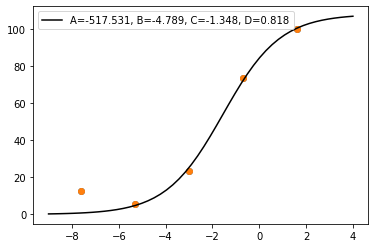

In [25]:
c_cub = np.array([ 4.999999996, 0.500000001, 0.05, 0.005, 0.0005])
L = np.array([100.000, 73.391, 23.388, 5.649, 12.35343319])

#Calculando el ln de la concentración
c_cub = np.log(c_cub)

plt.scatter(c_cub,L)

#Modelo 2

def Sigmoide1(x,A,B,C,D): 
    return A/(B+C*np.exp(-x*D))

#Param contiene los parámetros, pcov es la matriz de covarianza (los elementos diagonales son la varianza de los parámetros ajustados)
# Link: https://learntutorials.net/es/scipy/topic/10133/ajustando-funciones-con-scipy-optimize-curve-fit#:~:text=curve_fit%20devuelve%20popt%20y%20pcov,varianza%20de%20los%20par%C3%A1metros%20ajustados.
param, pcov = curve_fit(Sigmoide,c_cub,L)
param1, pcov1 = curve_fit(Sigmoide1,c_cub,L)

#gráfica de los ajustes, son casi indistingibles

t = np.linspace(-9,4,50)
plt.scatter(c_cub,L)
#plt.plot(t,Sigmoide(t,*param),color='r', label='A=%.3f, B=%.3f, C=%.3f' %tuple(param))
plt.plot(t,Sigmoide1(t,*param1),color='k', label='A=%.3f, B=%.3f, C=%.3f, D=%.3f' %tuple(param1))
plt.legend(loc=0)

Power_divergenceResult(statistic=177.78696912458943, pvalue=2.2272983372801886e-37)


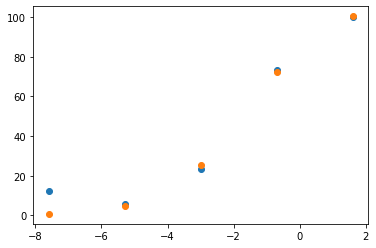

In [26]:
#Para realizar la prueba Chi cuadrado de bondad de ajuste

#Segundo modelo

L_esp1 = Sigmoide1(c_cub, *param1)      #Se calculan los esperados de acuerdo con el ajuste

a1 = stats.chisquare(f_obs = L, f_exp = L_esp1)   #Contiene el estadístico y el p_value

print(a1)

plt.scatter(c_cub,L)
plt.scatter(c_cub,L_esp1)

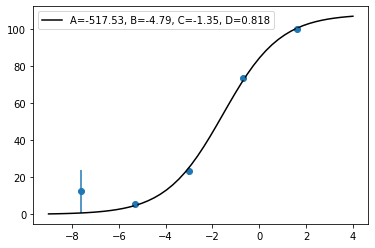

In [27]:
#Calculo del error cuadrático de cada dato y el error cuadrático medio

#Modelo 2
error1 = np.sqrt((L - L_esp1)**2)
erm1 = error1.mean()

t = np.linspace(-9,4,50)
plt.scatter(c_cub,L)
plt.plot(t,Sigmoide1(t,*param1),color='k', label='A=%.2f, B=%.2f, C=%.2f, D=%.3f' %tuple(param1))
plt.errorbar(c_cub,L, yerr=error1, xerr= 0, fmt='.')

coef_corr = np.corrcoef(L, Sigmoide1(c_cub,*param1))

plt.legend(loc=0)

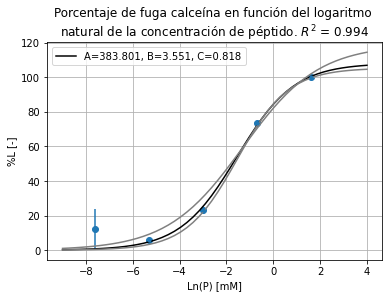

In [28]:
#Calculando las nuevas sigmoides considerando dichos errores

#Modelo 2: 

L_max1 = L + error1
L_min1 = L - error1

#Encontrando los parámetros: 

param1_max, pcov1 = curve_fit(Sigmoide1,c_cub,L_max1)
param1_min, pcov1 = curve_fit(Sigmoide1,c_cub,L_min1)

t = np.linspace(-9,4,50)
plt.scatter(c_cub,L)
plt.plot(t,Sigmoide1(t,*param1),color='k', label='A=%.3f, B=%.3f, C=%.3f' %tuple(param))
plt.plot(t,Sigmoide1(t,*param1_max), color = 'gray')
plt.plot(t,Sigmoide1(t,*param1_min), color = 'gray')
plt.errorbar(c_cub,L, yerr=error1, xerr=0, fmt='.')
plt.xlabel('Ln(P) [mM]')
plt.ylabel('%L [-]')
plt.title('Porcentaje de fuga calceína en función del logaritmo \n' 'natural de la concentración de péptido. $R^2$ = {:.3f}'.format(coef_corr[0][1]))
plt.grid()


plt.legend(loc=0)

In [29]:
#Determinación de concentración para L=50%

c501 = np.log((param1[0]-50*param1[1])/(param1[2]*50))/(-param1[3])

c501_2 = np.exp(c501)

#Incertidumbre de acuerdo con ajustes: 

c501max_0 = np.log((param1_max[0]-50*param1_max[1])/(param1_max[2]*50))/(-param1_max[3])

c501max_2 = np.exp(c501max_0)

c501min_0 = np.log((param1_min[0]-50*param1_min[1])/(param1_min[2]*50))/(-param1_min[3])

c501min_2 = np.exp(c501min_0)

c501_2, c501max_2, c501min_2

(0.17703614980826776, 0.1629024054491279, 0.1924708953962267)

In [30]:
#Error

err_0 = np.sqrt((c501_2 - c501max_2)**2)
err_1 = np.sqrt((c501_2 - c501min_2)**2)

a = min(err_0,err_1)
b = max(err_0,err_1)

e_min.append(a)
e_max.append(b)

# CTN3 - Resultados

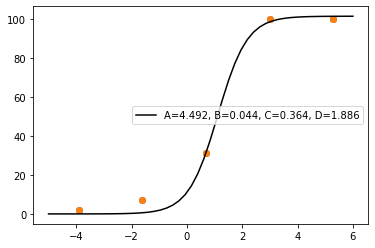

In [31]:
c_cub = np.array([ 199.999999, 19.99999996, 2.000000002, 0.200000001, 0.02])
L = np.array([100.000, 100.000, 31.082, 7.281, 2.064])

#Calculando el ln de la concentración
c_cub = np.log(c_cub)

plt.scatter(c_cub,L)

#Modelo 1

def Sigmoide(x,A,B,C): 
    return A/(B+np.exp(-C*x))

#Modelo 2

def Sigmoide1(x,A,B,C,D): 
    return A/(B+C*np.exp(-x*D))

#Param contiene los parámetros, pcov es la matriz de covarianza (los elementos diagonales son la varianza de los parámetros ajustados)
# Link: https://learntutorials.net/es/scipy/topic/10133/ajustando-funciones-con-scipy-optimize-curve-fit#:~:text=curve_fit%20devuelve%20popt%20y%20pcov,varianza%20de%20los%20par%C3%A1metros%20ajustados.
param, pcov = curve_fit(Sigmoide,c_cub,L)
param1, pcov1 = curve_fit(Sigmoide1,c_cub,L)

#gráfica de los ajustes, son casi indistingibles

t = np.linspace(-5,6,50)
plt.scatter(c_cub,L)
#plt.plot(t,Sigmoide(t,*param),color='r', label='A=%.3f, B=%.3f, C=%.3f' %tuple(param))
plt.plot(t,Sigmoide1(t,*param1),color='k', label='A=%.3f, B=%.3f, C=%.3f, D=%.3f' %tuple(param1))
plt.legend(loc=0)

Power_divergenceResult(statistic=623.737312409379, pvalue=1.1285624303191626e-133)


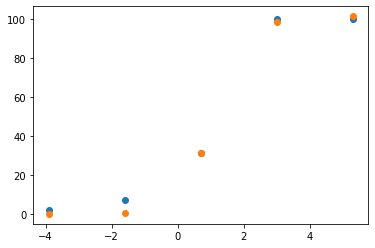

In [32]:
#Para realizar la prueba Chi cuadrado de bondad de ajuste

#Segundo modelo

L_esp1 = Sigmoide1(c_cub, *param1)      #Se calculan los esperados de acuerdo con el ajuste

a1 = stats.chisquare (f_obs = L, f_exp = L_esp1)   #Contiene el estadístico y el p_value

print(a1)

plt.scatter(c_cub,L)
plt.scatter(c_cub,L_esp1)

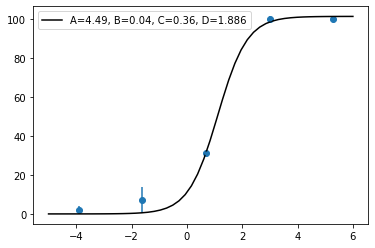

In [33]:
#Calculo del error cuadrático de cada dato y el error cuadrático medio

#Modelo 2
error1 = np.sqrt((L - L_esp1)**2)
erm1 = error1.mean()

t = np.linspace(-5,6,50)
plt.scatter(c_cub,L)
plt.plot(t,Sigmoide1(t,*param1),color='k', label='A=%.2f, B=%.2f, C=%.2f, D=%.3f' %tuple(param1))
plt.errorbar(c_cub,L, yerr=error1, xerr= 0, fmt='.')

coef_corr = np.corrcoef(L, Sigmoide1(c_cub,*param1))

plt.legend(loc=0)

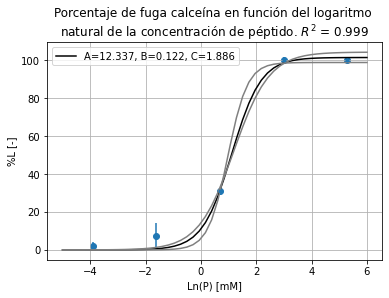

In [34]:
#Calculando las nuevas sigmoides considerando dichos errores

#Modelo 2: 

L_max1 = L + error1
L_min1 = L - error1

#Encontrando los parámetros: 

param1_max, pcov1 = curve_fit(Sigmoide1,c_cub,L_max1)
param1_min, pcov1 = curve_fit(Sigmoide1,c_cub,L_min1)

t = np.linspace(-5,6,50)
plt.scatter(c_cub,L)
plt.plot(t,Sigmoide1(t,*param1),color='k', label='A=%.3f, B=%.3f, C=%.3f' %tuple(param))
plt.plot(t,Sigmoide1(t,*param1_max), color = 'gray')
plt.plot(t,Sigmoide1(t,*param1_min), color = 'gray')
plt.errorbar(c_cub,L, yerr=error1, xerr=0, fmt='.')
plt.xlabel('Ln(P) [mM]')
plt.ylabel('%L [-]')
plt.title('Porcentaje de fuga calceína en función del logaritmo \n' 'natural de la concentración de péptido. $R^2$ = {:.3f}'.format(coef_corr[0][1]))
plt.grid()
plt.legend(loc=0)

In [35]:
#Determinación de concentración para L=50%

c501 = np.log((param1[0]-50*param1[1])/(param1[2]*50))/(-param1[3])

c501_3 = np.exp(c501)

#Incertidumbre de acuerdo con ajustes: 

c501max_0 = np.log((param1_max[0]-50*param1_max[1])/(param1_max[2]*50))/(-param1_max[3])

c501max_3 = np.exp(c501max_0)

c501min_0 = np.log((param1_min[0]-50*param1_min[1])/(param1_min[2]*50))/(-param1_min[3])

c501min_3 = np.exp(c501min_0)

In [36]:
#Error

err_0 = np.sqrt((c501_3 - c501max_3)**2)
err_1 = np.sqrt((c501_3 - c501min_3)**2)

a = min(err_0,err_1)
b = max(err_0,err_1)

e_min.append(a)
e_max.append(b)

# CTN4 - Resultados

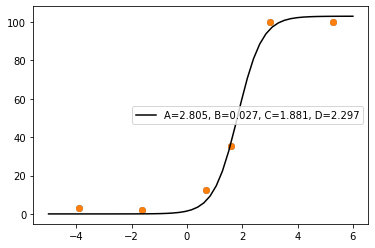

In [37]:
c_cub = np.array([199.999999, 19.99999996, 2.000000002, 0.200000001, 0.02, 4.999999996])
L = np.array([100.00, 100.00, 12.46, 2.08, 3.06, 35.46])

#Calculando el ln de la concentración
c_cub = np.log(c_cub)

plt.scatter(c_cub,L)

#Modelo 1

def Sigmoide(x,A,B,C): 
    return A/(B+np.exp(-C*x))

#Modelo 2

def Sigmoide1(x,A,B,C,D): 
    return A/(B+C*np.exp(-x*D))

#Param contiene los parámetros, pcov es la matriz de covarianza (los elementos diagonales son la varianza de los parámetros ajustados)
# Link: https://learntutorials.net/es/scipy/topic/10133/ajustando-funciones-con-scipy-optimize-curve-fit#:~:text=curve_fit%20devuelve%20popt%20y%20pcov,varianza%20de%20los%20par%C3%A1metros%20ajustados.
param, pcov = curve_fit(Sigmoide,c_cub,L)
param1, pcov1 = curve_fit(Sigmoide1,c_cub,L)

#gráfica de los ajustes, son casi indistingibles

t = np.linspace(-5,6,50)
plt.scatter(c_cub,L)
#plt.plot(t,Sigmoide(t,*param),color='r', label='A=%.3f, B=%.3f, C=%.3f' %tuple(param))
plt.plot(t,Sigmoide1(t,*param1),color='k', label='A=%.3f, B=%.3f, C=%.3f, D=%.3f' %tuple(param1))
plt.legend(loc=0)

Power_divergenceResult(statistic=50294.32812766635, pvalue=0.0)


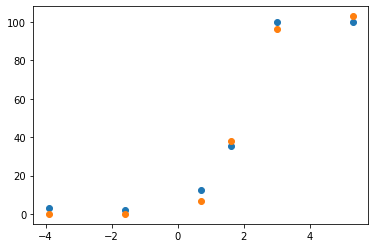

In [38]:
#Para realizar la prueba Chi cuadrado de bondad de ajuste

#Segundo modelo

L_esp1 = Sigmoide1(c_cub, *param1)      #Se calculan los esperados de acuerdo con el ajuste

a1 = stats.chisquare (f_obs = L, f_exp = L_esp1)   #Contiene el estadístico y el p_value

print(a1)

plt.scatter(c_cub,L)
plt.scatter(c_cub,L_esp1)

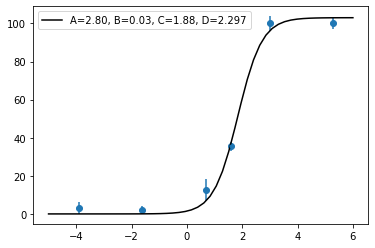

In [39]:
#Calculo del error cuadrático de cada dato y el error cuadrático medio

#Modelo 2
error1 = np.sqrt((L - L_esp1)**2)
erm1 = error1.mean()

t = np.linspace(-5,6,50)
plt.scatter(c_cub,L)
plt.plot(t,Sigmoide1(t,*param1),color='k', label='A=%.2f, B=%.2f, C=%.2f, D=%.3f' %tuple(param1))
plt.errorbar(c_cub,L, yerr=error1, xerr= 0, fmt='.')

coef_corr = np.corrcoef(L, Sigmoide1(c_cub,*param1))

plt.legend(loc=0)

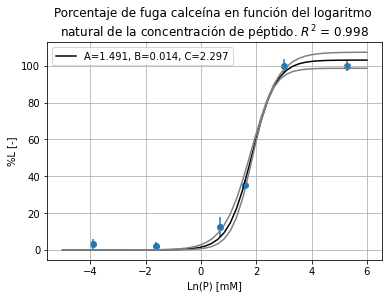

In [40]:
#Calculando las nuevas sigmoides considerando dichos errores

#Modelo 2: 

L_max1 = L + error1
L_min1 = L - error1

#Encontrando los parámetros: 

param1_max, pcov1 = curve_fit(Sigmoide1,c_cub,L_max1)
param1_min, pcov1 = curve_fit(Sigmoide1,c_cub,L_min1)

t = np.linspace(-5,6,50)
plt.scatter(c_cub,L)
plt.plot(t,Sigmoide1(t,*param1),color='k', label='A=%.3f, B=%.3f, C=%.3f' %tuple(param))
plt.plot(t,Sigmoide1(t,*param1_max), color = 'gray')
plt.plot(t,Sigmoide1(t,*param1_min), color = 'gray')
plt.errorbar(c_cub,L, yerr=error1, xerr=0, fmt='.')
plt.xlabel('Ln(P) [mM]')
plt.ylabel('%L [-]')
plt.title('Porcentaje de fuga calceína en función del logaritmo \n' 'natural de la concentración de péptido. $R^2$ = {:.3f}'.format(coef_corr[0][1]))
plt.grid()
plt.legend(loc=0)

In [41]:
#Determinación de concentración para L=50%

c501 = np.log((param1[0]-50*param1[1])/(param1[2]*50))/(-param1[3])

c501_4 = np.exp(c501)

#Incertidumbre de acuerdo con ajustes: 

c501max_0 = np.log((param1_max[0]-50*param1_max[1])/(param1_max[2]*50))/(-param1_max[3])

c501max_4 = np.exp(c501max_0)

c501min_0 = np.log((param1_min[0]-50*param1_min[1])/(param1_min[2]*50))/(-param1_min[3])

c501min_4 = np.exp(c501min_0)

c501_4, c501max_4, c501min_4

(6.161757195684859, 5.74564146126357, 6.421655310852331)

In [42]:
#Error

err_0 = np.sqrt((c501_4 - c501max_4)**2)
err_1 = np.sqrt((c501_4 - c501min_4)**2)

a = min(err_0,err_1)
b = max(err_0,err_1)

e_min.append(a)
e_max.append(b)

# Comparación concentraciones 50%

In [43]:
e_min = np.array(e_min)/30
e_max = np.array(e_max)/30

error = np.array([e_min, e_max])

Text(0.5, 1.0, 'Relación péptidos/lípidos para fuga de 50% \n escala logarítmica')

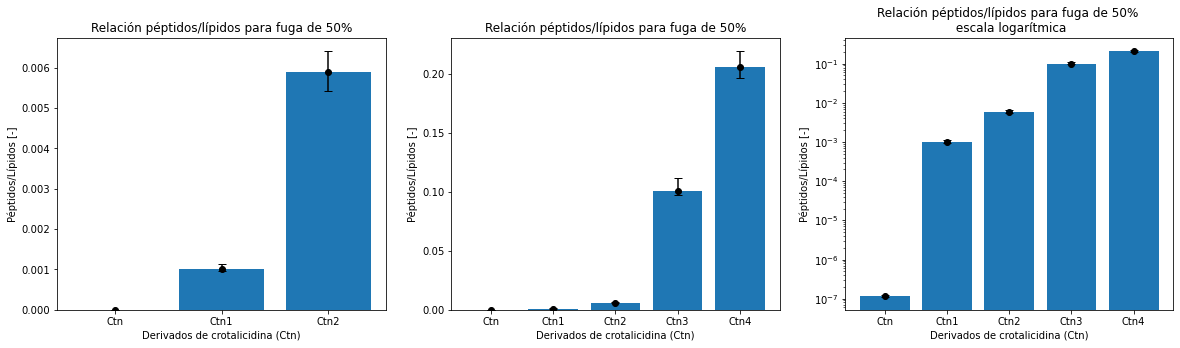

In [44]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)

concentraciones_1 = np.array([c501_0/30, c501_1/30, c501_2/30])
nombres = ['Ctn', 'Ctn1', 'Ctn2']
plt.bar(nombres,concentraciones_1)
plt.errorbar(nombres,concentraciones_1, yerr=error[:,:3], fmt="o", color="k", capsize = 4)
plt.xlabel("Derivados de crotalicidina (Ctn)")
#plt.yscale('log')
plt.ylabel("Péptidos/Lípidos [-]")
plt.title("Relación péptidos/lípidos para fuga de 50%")

plt.subplot(1,3,2)

concentraciones = np.array([c501_0/30, c501_1/30, c501_2/30, c501_3/30, c501_4/30])
nombres = ['Ctn','Ctn1', 'Ctn2','Ctn3','Ctn4']
plt.errorbar(nombres,concentraciones, yerr=error, fmt="o", color="k", capsize = 4)
plt.bar(nombres,concentraciones)
plt.xlabel("Derivados de crotalicidina (Ctn)")
plt.ylabel("Péptidos/Lípidos [-]")
#plt.yscale('log')
plt.title("Relación péptidos/lípidos para fuga de 50%")

plt.subplot(1,3,3)

concentraciones = np.array([c501_0/30, c501_1/30, c501_2/30, c501_3/30, c501_4/30])
nombres = ['Ctn','Ctn1', 'Ctn2','Ctn3','Ctn4']
plt.errorbar(nombres,concentraciones, yerr=error, fmt="o", color="k", capsize = 4)
plt.bar(nombres,concentraciones)
plt.xlabel("Derivados de crotalicidina (Ctn)")
plt.ylabel("Péptidos/Lípidos [-]")
plt.yscale('log')
plt.title("Relación péptidos/lípidos para fuga de 50% \n escala logarítmica")